<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/GoogleTrends_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Trends API for Python

## In this tutorial, I will demonstrate how to use the Google Trends API for getting the current trending topics on the internet.


![alt text](https://cdn-images-1.medium.com/max/1200/1*Fi6masemXJT3Q8YWekQCDQ.png)

# Introduction

[Google trends](https://trends.google.com/trends/?geo=US) is a website that analyzes and lists the popular search results on Google search based on various regions and languages. Google Trends is Google's website (obviously). With the help of this tutorial, you can get the trending results and many more from google trends website using python. You don't need to manually search and copy the trending results, the Python API called `pytrends` does the job for you. Before getting started, I want all of you guys to go through the official documentation of the `pytrends` API.

[pytrends API](https://pypi.org/project/pytrends/)



---

# Installation

The first step is to install the library manually. So, open your favorite IDE or notebook start typing the following code. I will use [Google Colab](https://colab.research.google.com/) because it's my favorite notebook.



> If you are using jupyter notebook, just type the code as it is (make sure you have '!' at the beginning)


In [ ]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=43a55a739a5e7f5c4d84f058b480e757035941de509aff5b87341b68a1ca6011
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


Or, if you are using an IDE, just type the following code



In [ ]:
# no need to execute the next statement if you did the earlier pip install
# pip install pytrends

After executing the above code you should get a successful message as shown above



---



# Implementation

## Connecting to Google

You must connect to Google first because after all, we are requesting the Google trending topics from Google Trends. For this, we need to import the method called `TrendReq` from `pytrends.request` library. Also, I will import the pandas library to store and visualize the data which you see in the later tutorial.

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()



---



## Interest By Region

Let us see the terms which are popular in the region worldwide. I will choose, the term to be searched as "Gun" (replace it as you like).

In [ ]:
pytrend.build_payload(kw_list=['Gun'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(20)

,Gun
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


**Now you might be thinking what are the values, what do they denote?** 

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

Let us plot the result on a bar graph because sometimes visual representation gives a clear picture.

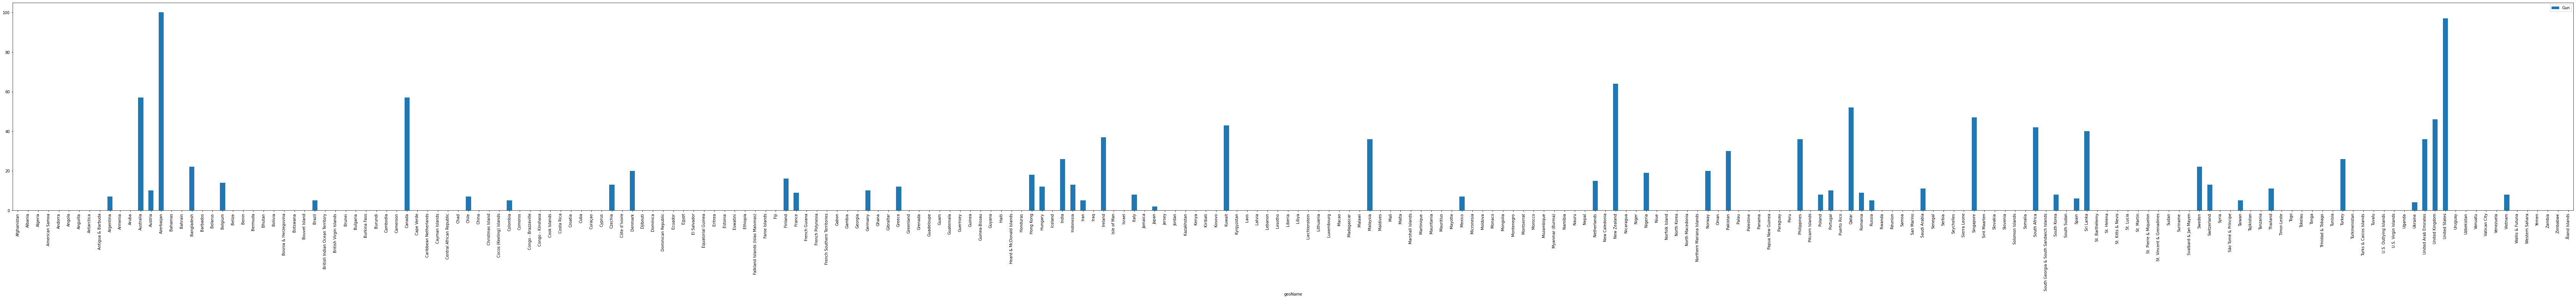

In [ ]:
df.reset_index().plot(x='geoName', y='Gun', figsize=(120, 10), kind ='bar')

Also, you use the parameter `resolution = 'COUNTRY_NAME'` to filter the results.



---



## Daily Search Trends

Now let us get the top daily search trends worldwide. To do this we have to use the `trending_searches()` method. If you want to search worldwide just don't pass any parameter.

In [ ]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Nadal
1,Brad Johnson actor died
2,Colorado Avalanche
3,Joe Girardi
4,Resident Evil 4 remake


Make sure you enter the country name in lowercase `pn = "canada"` . Also, you can compare the above results with the [google trend's result](https://trends.google.com/trends/trendingsearches/daily?geo=US). To get today's trending topics just use:

In [ ]:
df = pytrend.today_searches(pn='US')



---



## Top Charts

Let us see what was trending in 2021. With the help of `top_charts` method we can get the top trending searches yearly.

In [ ]:
# Get Google Top Charts
df = pytrend.top_charts(2021, hl='en-US', tz=300, geo='GLOBAL')
df.head(20)

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


To compare the results just visit [Google Trends](https://trends.google.com/trends/yis/2019/GLOBAL/). We can specify the year and the country that we want to see the trending searches.



---



## Google Keyword Suggestions

Let us see how can we obtain google's keyword suggestion. If you don't know what I'm talking about. The below image explains things more clear.

![alt text](https://cdn-images-1.medium.com/max/1200/1*QRpWWBS1SHXBr71Jp1NwQA.png)

In [ ]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='sailfish')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Basking shark,Sharks
1,Sailfish,Fish
2,Indo-Pacific sailfish,Fish
3,Atlantic sailfish,Fish
4,Marlin,Fish




---



## Related Queries

It's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries. Let us see what are the related queries for the topic "***Coronavirus***". Always remember when you want to change the topic name just run the following code again with the new name as the parameter.

In [ ]:
pytrend.build_payload(kw_list=['Coronavirus'])

Now let's run the method `related_queries` which returns a dictionary full of related queries for the topic ***Coronavirus*** 

In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0              coronavirus update    100
1               coronavirus cases     90
2                news coronavirus     71
3                  coronavirus uk     67
4                          corona     61
5               coronavirus india     48
6            coronavirus symptoms     42
7              coronavirus france     35
8   thank you coronavirus helpers     33
9         coronavirus worldometer     33
10                    worldometer     33
11                 coronavirus us     32
12                coronavirus map     31
13                coronavirus usa     30
14               coronavirus live     30
15              coronavirus world     29
16             italia coronavirus     29
17               coronavirus tips     29
18             coronavirus deaths     24
19                       covid 19     24
20                   corona virus     23
21             coronavirus españa     22
22              china coronavirus   

Similarly, you can also search for the related topics just run the below code to do so:

In [ ]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value formattedValue                                            link  \
0   288100       Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
1   113250       Breakout  /trends/explore?q=/g/11jg8c8t98&date=today+5-y   
2    62400       Breakout      /trends/explore?q=/m/07l88z&date=today+5-y   
3    25150       Breakout  /trends/explore?q=/g/11j5cvcfjp&date=today+5-y   
4    12100       Breakout       /trends/explore?q=/m/09kvv&date=today+5-y   
5    12050       Breakout  /trends/explore?q=/g/11jfc_hmzh&date=today+5-y   
6    10550       Breakout       /trends/explore?q=/m/0bzty&date=today+5-y   
7     9250       Breakout       /trends/explore?q=/m/0l3cy&date=today+5-y   
8     7850       Breakout       /trends/explore?q=/m/06w92&date=today+5-y   
9     6150       Breakout      /trends/explore?q=/m/0chgr2&date=today+5-y   
10    5400       Breakout       /trends/explore?q=/m/0c663&date=today+5-y   
11    5250       Breakout       /trends/explore?q=/m



---



This is the end of the tutorial, I hope you guys have learned a thing or two. If you guys have any doubts regarding the tutorial let me know via the comment section. Although this is a short tutorial there is a lot to learn. Alright see you in my next tutorial, have a good day!!!